# Singapore Resale Price Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mutual_info_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('../../datasets/sg-resale-price-2017.csv')
df.columns
df.head()

In [182]:

# Display numerical variable
num = df.describe().columns
df.describe()
num


Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [183]:
# display categorical variable
cat = df.describe(include=["O"]).columns

In [184]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,162849.000000,162849.000000,1.628490e+05
mean,97.380931,1995.761399,4.875740e+05
std,24.034119,13.885680,1.687071e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.650000e+05
50%,93.000000,1996.000000,4.570000e+05
75%,112.000000,2008.000000,5.800000e+05
max,249.000000,2022.000000,1.500000e+06


In [185]:
df_numerical = df.copy()
df_numerical = df_numerical.drop(cat,axis=1)
df_numerical

,floor_area_sqm,lease_commence_date,resale_price
0,44.0,1979,232000.0
1,67.0,1978,250000.0
2,67.0,1980,262000.0
3,68.0,1980,265000.0
4,67.0,1980,265000.0
...,...,...,...
162844,113.0,2017,650000.0
162845,112.0,2016,701138.0
162846,142.0,1988,740000.0
162847,150.0,1988,875000.0


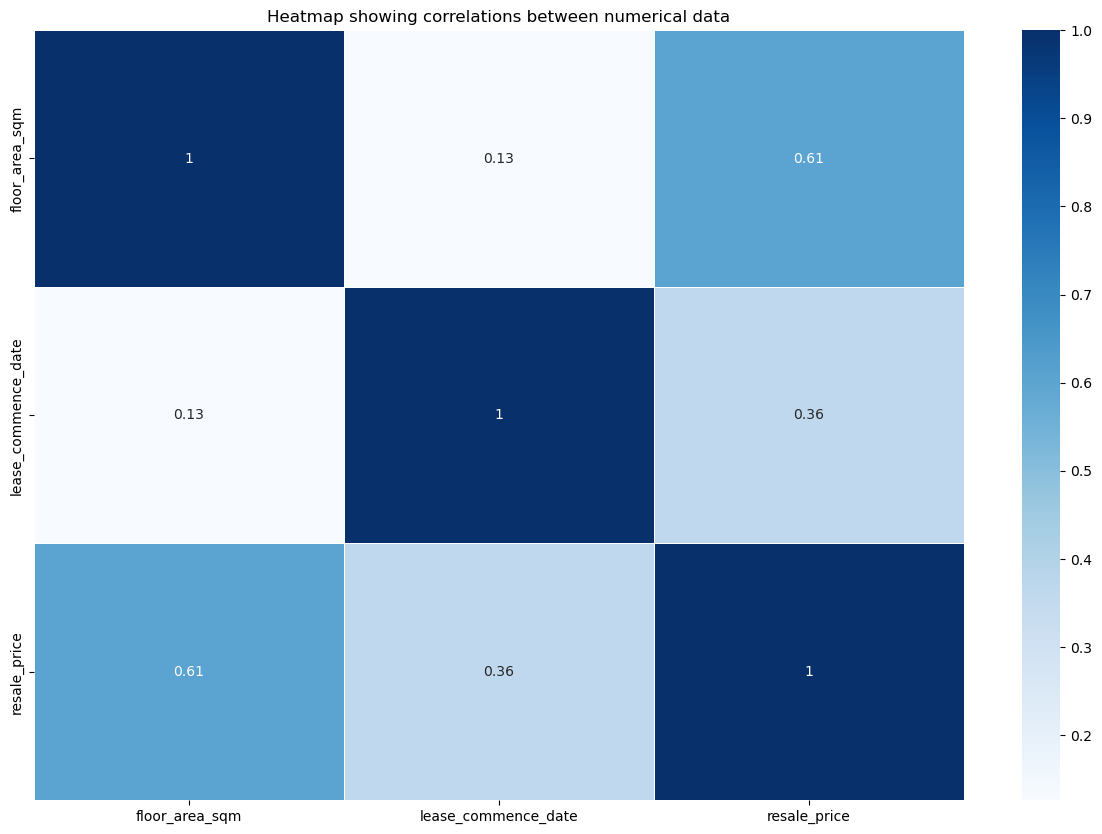

In [186]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_numerical.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

# Mutual Info Score

In [187]:
df_categorical = df.copy()
def mutual_info_resale_score(series):
    return mutual_info_score(series, df.resale_price)
mi = df[cat].apply(mutual_info_resale_score)
mi.sort_values(ascending=False)


block              1.895608
street_name        1.144667
remaining_lease    1.066560
month              0.389011
flat_type          0.375131
town               0.304204
flat_model         0.298920
storey_range       0.145081
dtype: float64

In [188]:
regression_data = df.copy()
regression_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
162844,2023-09,YISHUN,5 ROOM,511B,YISHUN ST 51,04 TO 06,113.0,Improved,2017,92 years 11 months,650000.0
162845,2023-09,YISHUN,5 ROOM,505B,YISHUN ST 51,10 TO 12,112.0,Improved,2016,91 years 06 months,701138.0
162846,2023-09,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,63 years 09 months,740000.0
162847,2023-09,YISHUN,EXECUTIVE,355,YISHUN RING RD,04 TO 06,150.0,Maisonette,1988,64 years 03 months,875000.0


In [189]:
regression_data['resale_price'] = np.log1p(regression_data['resale_price'])


df_full_train, df_test = train_test_split(regression_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train),len(df_val),len(df_test)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.resale_price.values
y_val = df_val.resale_price.values
y_test = df_test.resale_price.values

del df_train['resale_price']
del df_val['resale_price']
del df_test['resale_price']

In [190]:

num = df.describe().columns
cat = df.describe(include=["O"]).columns
cat,num
num = ['floor_area_sqm', 'lease_commence_date']
cat = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
        'flat_model', 'remaining_lease']
num+cat

['floor_area_sqm',
 'lease_commence_date',
 'month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'flat_model',
 'remaining_lease']

<Axes: xlabel='resale_price', ylabel='Count'>

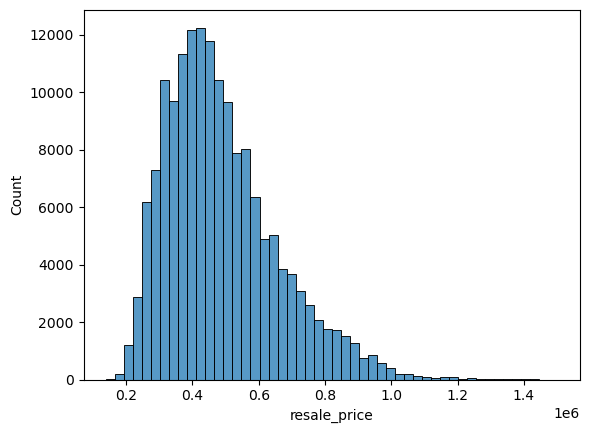

In [191]:
sns.histplot(df.resale_price,bins=50)

In [193]:
num+cat

['floor_area_sqm',
 'lease_commence_date',
 'month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'flat_model',
 'remaining_lease']

In [194]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cat = ['remaining_lease','flat_type','town','flat_model','storey_range','street_name']
train_dict = df_train[num+cat].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[num+cat].to_dict(orient='records')
X_val = dv.transform(val_dict)



0 2686209391.99
model_score -0.0002456851504795132
0.01 0.092
model_score 0.9191393026893571
0.1 0.092
model_score 0.918810565486453
1 0.095
model_score 0.9103427673329054
10 0.111
model_score 0.874040864074577


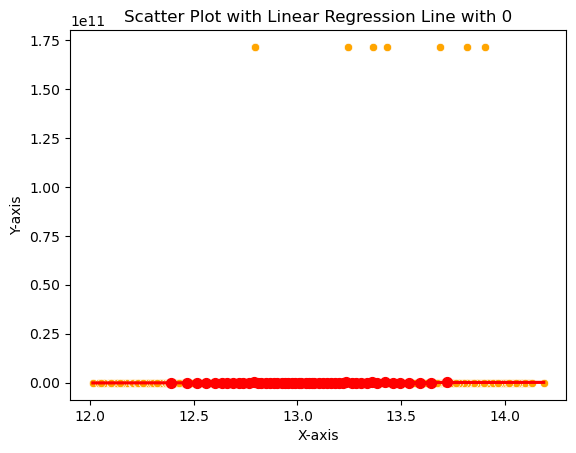

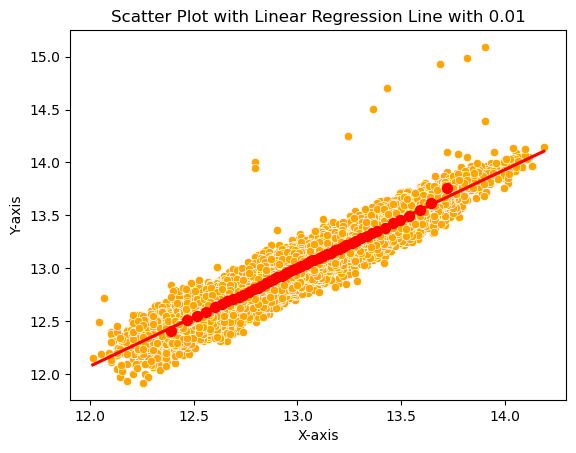

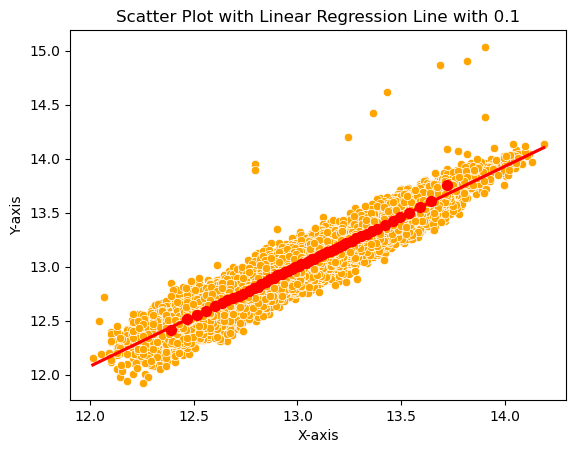

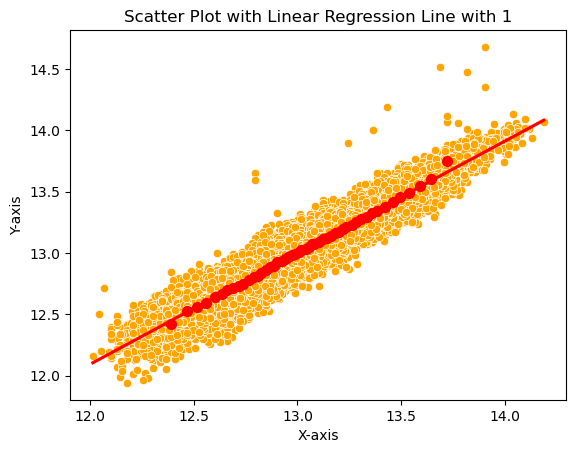

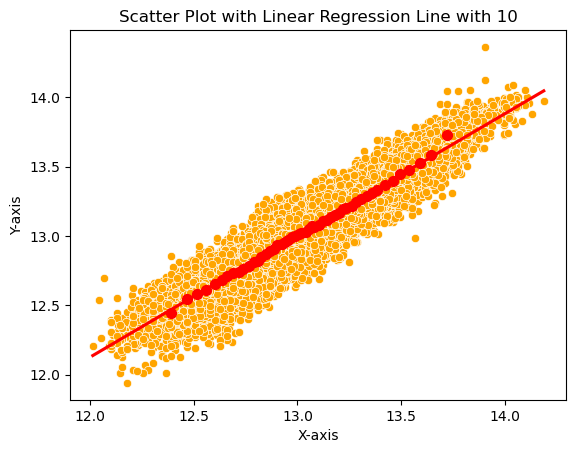

In [201]:

for k,a in enumerate([0, 0.01, 0.1, 1, 10]):
# for k,a in enumerate(np.arange(0.1, 2, 0.1)):
    model = Ridge(alpha=a,random_state=51)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))
    print("model_score",r2_score(y_pred,y_val))
    plt.figure(k)
    # sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
    # sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
    
    sns.scatterplot(x=y_val, y=y_pred,color="orange")
    
    # Add a regression line
    sns.regplot(x=y_val, y=y_pred, ci=None, color='red',x_bins=50)
    
    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Scatter Plot with Linear Regression Line with {a}')
   
    

# Full Train

In [ ]:
cat = ['remaining_lease','flat_type','town','flat_model','storey_range','street_name']

full_df = df.copy()
y_train = full_df.resale_price.values
full_df = full_df.drop(['resale_price'],axis=1)



full_dict = full_df[num+cat].to_dict(orient='records')
X_train = dv.transform(full_dict)

model = Ridge(alpha=0.01,random_state=51)
model.fit(X_train, y_train)

# ----------- Full Train -------------------------------
test_dict = df_test[num+cat].to_dict(orient='records')
X_test = dv.transform(test_dict)




# score = np.sqrt(mean_squared_error(y_test, y_pred))

# print(a, round(score, 3))
# print("model_score",r2_score(y_pred,y_test))

In [179]:
data = dv.transform(df.iloc[129999][num+cat].to_dict())
y_pred = model.predict(data)
y_pred[0],df.iloc[129999][num+cat]
# y_pred

(446222.6633833349,
 floor_area_sqm                       82.0
 lease_commence_date                  1975
 remaining_lease        51 years 08 months
 flat_type                          4 ROOM
 town                                BEDOK
 flat_model                       Improved
 storey_range                     13 TO 15
 street_name                 CHAI CHEE AVE
 Name: 129999, dtype: object)